Create a plot with the results of the variance-based decomposition based on the Sobol indices from the chaos expansions deriving for the activation emulator

In [206]:
import numpy as np
import pandas as pd

from marc_analysis import colortext_legend

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', context='talk')


/Users/daniel/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load up the sobol indices data from the 4th order expansions for 'main' and 'gCCN' experiments.

In [203]:
sobol_main = pd.read_pickle("data/MARC_main/expansion_order_4/sobol.p")
sobol_gCCN = pd.read_pickle("data/MARC_gCCN/expansion_order_4/sobol.p")

m = sobol_gCCN['Smax']
m = m.Main[m.n_terms == 1]
params = m.index

kappa_MOS (0.68899655751153521, 0.8681737867056154, 0.54376011946622071)
P (0.65098041296005249, 0.80784314870834351, 0.89019608497619629)
logN_DST02 (0.89059593116535862, 0.10449827132271793, 0.11108035462744099)
logmu_MOS #BEBEBE
logmu_MBS (0.69411766529083252, 0.3490196168422699, 0.15686275064945221)
logN_DST01 (0.98320646005518297, 0.5980161709820524, 0.59423301088459368)
logN_SSLT01 (0.78329874347238004, 0.68724338552531095, 0.8336793640080622)
logN_MOS (0.99990772780250103, 0.50099192647372981, 0.0051211073118098693)
logN_MBS (0.99175701702342312, 0.74648213716698619, 0.43401768935077328)
T (0.12572087695201239, 0.47323337360924367, 0.707327968232772)
logmu_ACC (0.99760092286502611, 0.99489427150464516, 0.5965244373854468)
logN_ACC (0.21171857311445125, 0.63326415104024547, 0.1812226118410335)
logV (0.42485198495434734, 0.2511495584950722, 0.60386007743723258)


/Users/daniel/anaconda/lib/python3.4/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


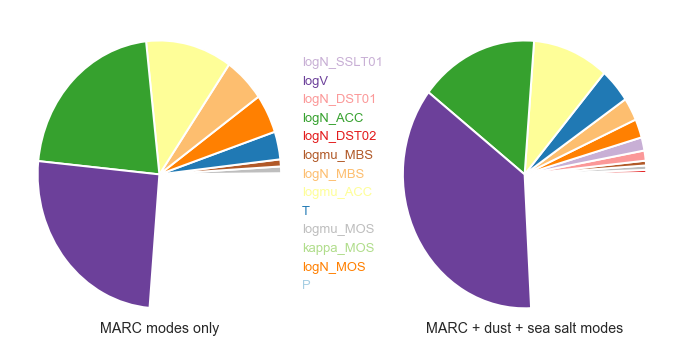

In [207]:
var_name = "Smax"

colors = sns.color_palette("Paired", 12)
colors.append("#BEBEBE")
color_map = {param: color for param, color in zip(params, colors)}

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax_main, ax_gCCN = axs

smax_main = sobol_main[var_name]
mains_main = smax_main.Main[smax_main.n_terms == 1]
mains_main.sort_values(inplace=True)
# mains_main.name = "Main Sobol Indices\nMARC modes"
mains_main.name = ""

smax_gCCN= sobol_gCCN[var_name]
mains_gCCN = smax_gCCN.Main[smax_gCCN.n_terms == 1]
mains_gCCN.sort_values(inplace=True)
# mains_gCCN.name = "Main Sobol Indices\nall modes"
mains_gCCN.name = ""

# Pie charts
colors_ordered = [color_map[param] for param in mains_main.index]
mains_main.plot(kind='pie', ax=ax_main, labels=None, colors=colors_ordered,
                wedgeprops=dict(lw=2, edgecolor='w'))
ax_main.set_xlabel("MARC modes only", labelpad=-20)

colors_ordered = [color_map[param] for param in mains_gCCN.index]
mains_gCCN.plot(kind='pie', ax=ax_gCCN, labels=None, colors=colors_ordered,
                wedgeprops=dict(lw=2, edgecolor='w'))
ax_gCCN.set_xlabel("MARC + dust + sea salt modes", labelpad=-20)


# Create legend
patches, labels = [], []
for param in mains_gCCN.index:
    color = color_map[param]
    print(param, color)
    rect = mpl.patches.Rectangle((0, 0), 0, 0, color=color, label=param,
                                 edgecolor='w')
    patches.append(rect)
    labels.append(param)
    
ax_main.legend(patches, labels)
colortext_legend(color_map, ax=ax_main, loc='center left',
                 bbox_to_anchor=(0.81, 0.5))

plt.savefig("figs/{}.sobol_pie.png".format(var_name), transparent=True,
            bbox_inches='tight', dpi=200)
plt.savefig("figs/{}.sobol_pie.pdf".format(var_name), transparent=True,
            bbox_inches='tight')